# Basics of Tensorflow

## House Pricing

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [6]:
#Definition of the model for the house price prediction
def house_model(y_new):
    xs = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
    ys = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
    model.fit(xs, ys, epochs=500)
    return model.predict(y_new)[0]

In [7]:
prediction = house_model([7.0])
print(prediction)

Train on 6 samples
Epoch 1/500
6/6 [==============================] - 0s 23ms/sample - loss: 44.1331
Epoch 2/500
6/6 [==============================] - 0s 1ms/sample - loss: 20.4276
Epoch 3/500
6/6 [==============================] - 0s 1ms/sample - loss: 9.4560
Epoch 4/500
6/6 [==============================] - 0s 1ms/sample - loss: 4.3780
Epoch 5/500
6/6 [==============================] - 0s 1ms/sample - loss: 2.0278
Epoch 6/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.9400
Epoch 7/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.4365
Epoch 8/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.2035
Epoch 9/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.0956
Epoch 10/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.0457
Epoch 11/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.0226
Epoch 12/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.0119
Epoch 13/500
6/

## MNIST Classifier

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


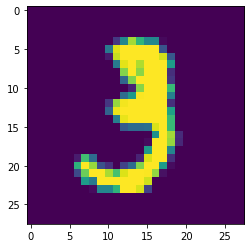

In [58]:
plt.imshow(x_train[10])

In [7]:
x_train, x_test = x_train/255.0, x_test/255.0

In [37]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

In [55]:
model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [56]:
history = model.fit(x_train, y_train, epochs=10, callbacks=[myCallback()])

Train on 60000 samples
Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.1824 - accuracy: 0.9445
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1824 - accuracy: 0.9445
